In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
vehicle = pd.read_csv('vehicle_4_median.csv')
vehicle.head()

,Vehicle,Type,Compactness,Circularity,Distance Circularity,Radius Ratio,Axis Asppect Ratio,Max Length Aspect Ratio,Scatter Ratio,Elongatedness,Axis Rectangularity,Max Length rectangularity,Scaled Variance along major axis,Scaled variance along minor axis,Scaled radius of gyration,Skewness about major axis,Skewness about minor axis,Kurtosis about minor axis,Kurtosis about major axis,Hollows Ratio
0,van,1,93,48,83,178,72,10,156,42,20,159,176,379,174,70,6,16,187,197
1,van,1,91,41,84,141,57,9,149,45,19,143,170,364,158,72,9,14,189,196
2,saab,2,104,44,106,209,66,10,207,32,23,158,223,635,220,73,6,9,188,196
3,van,1,93,41,82,159,63,9,144,43,20,143,160,309,127,63,6,10,188,207
4,bus,3,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,188,183


In [2]:
print(vehicle.shape)

(826, 20)


In [3]:
print(vehicle['Vehicle'].unique())

['van' 'saab' 'bus' 'opel']


In [4]:
print(vehicle.groupby('Vehicle').size())

Vehicle
bus     214
opel    209
saab    209
van     194
dtype: int64


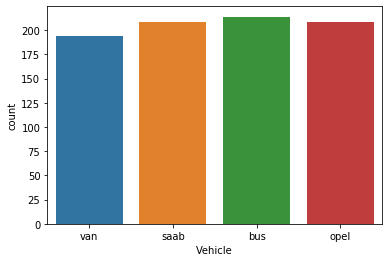

In [5]:
import seaborn as sns
sns.countplot(vehicle['Vehicle'],label="Count")
plt.show()

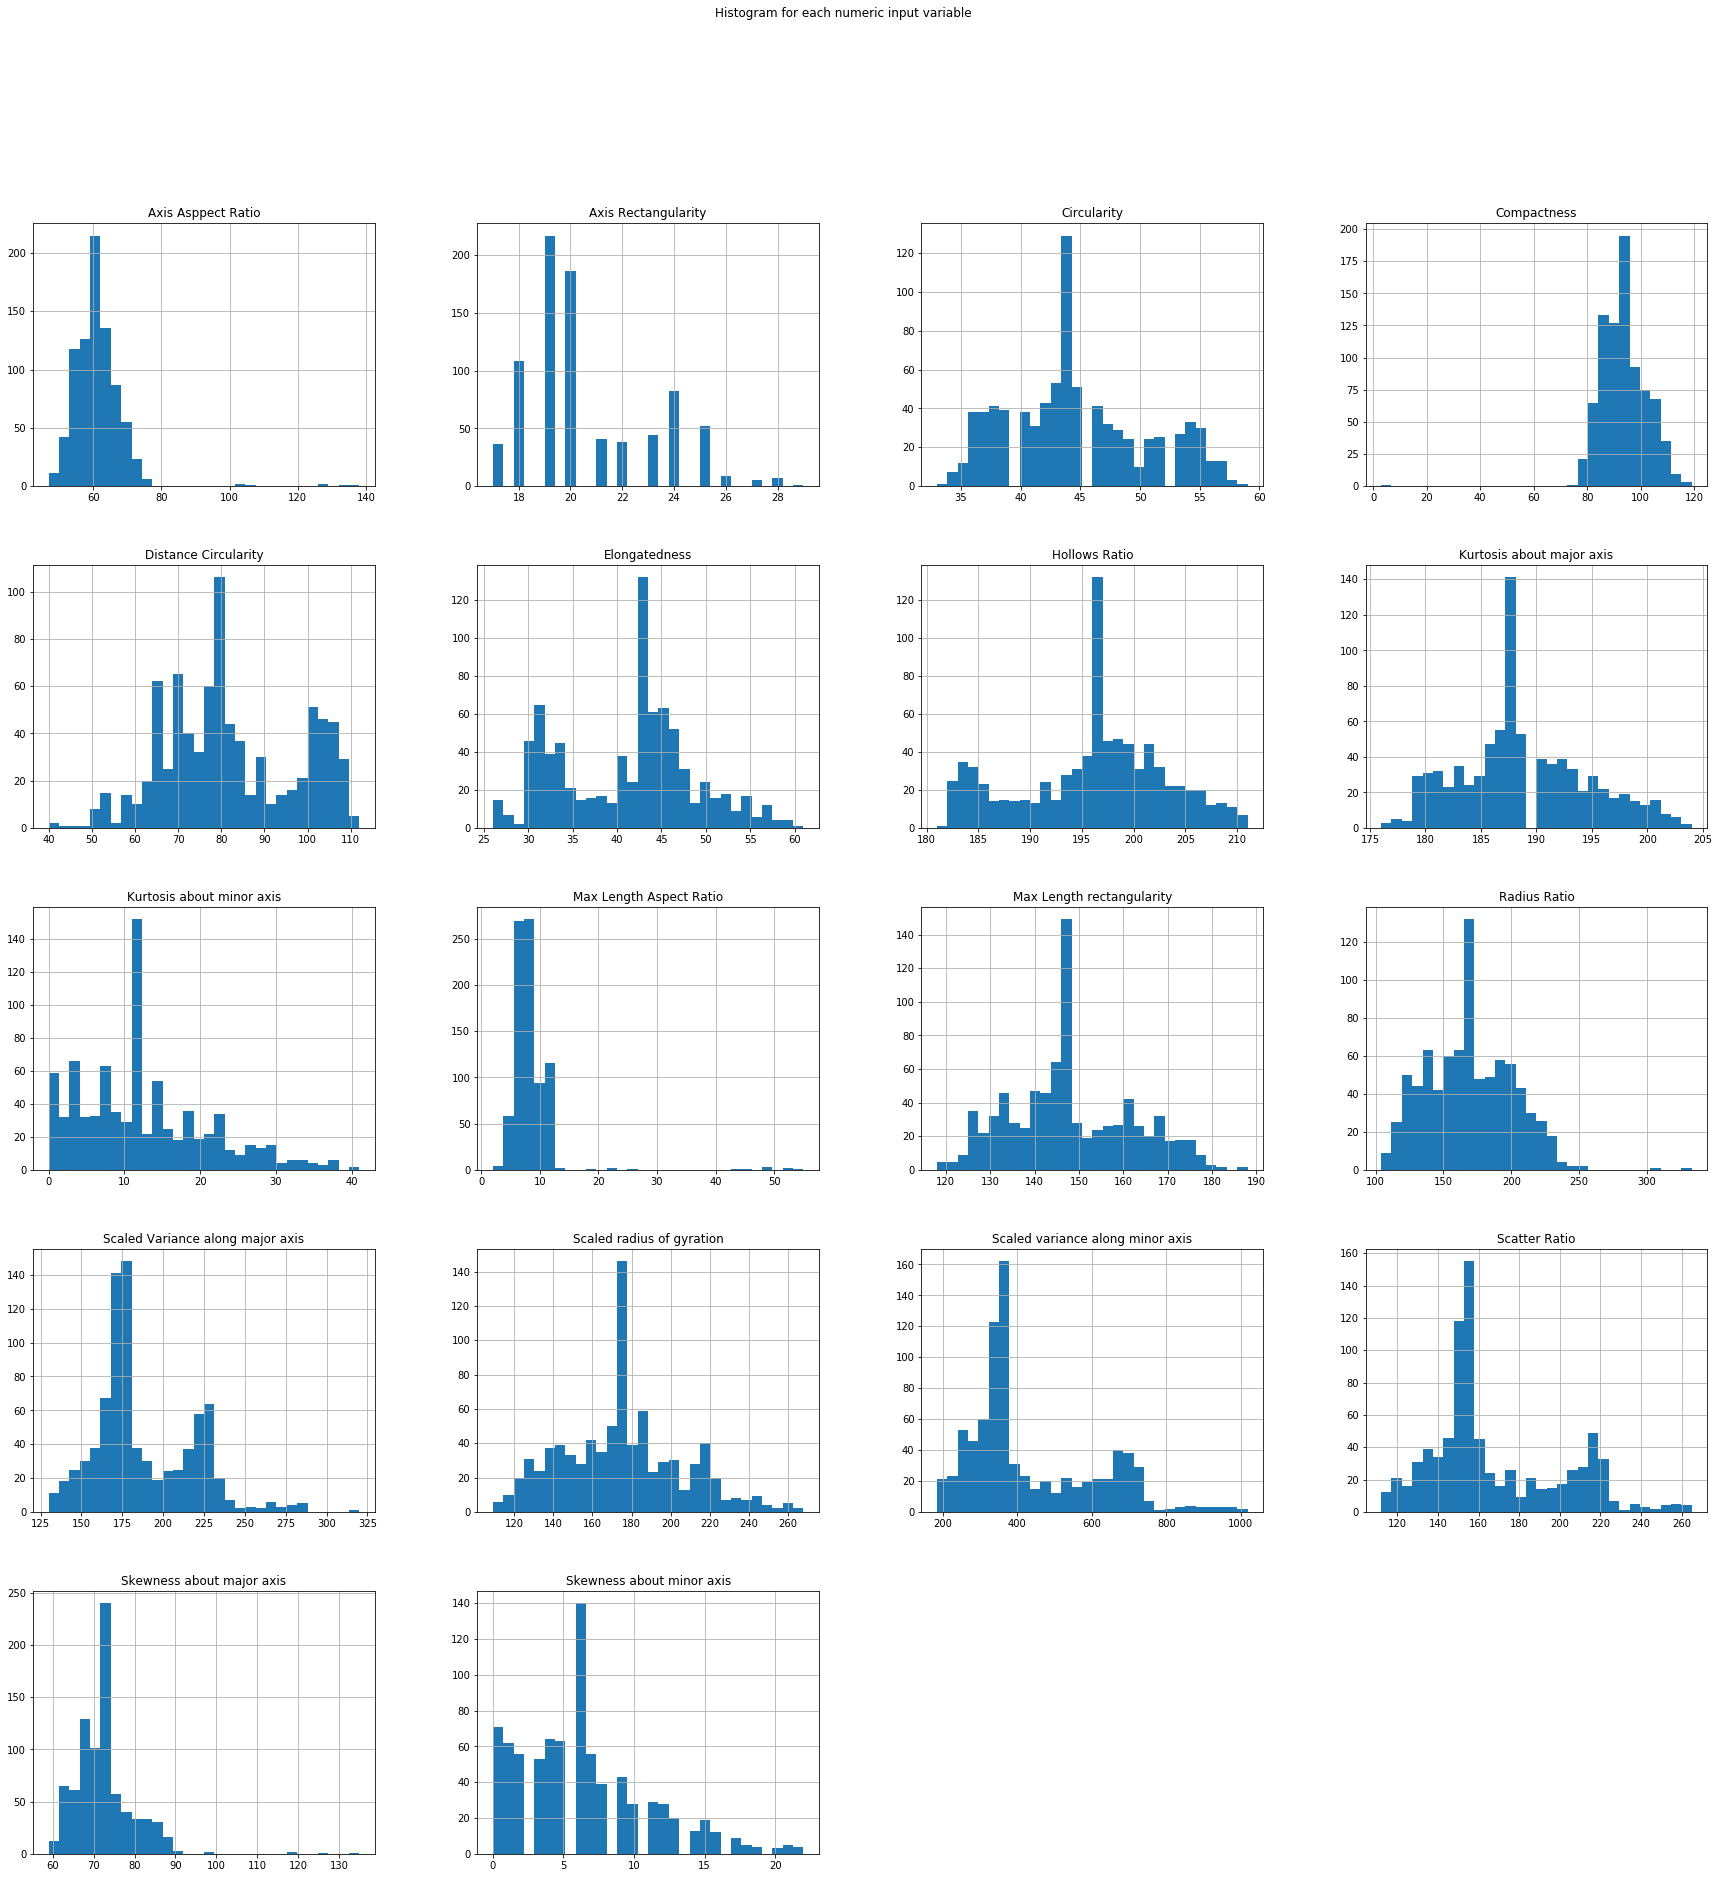

In [6]:
import pylab as pl
vehicle.drop('Type' ,axis=1).hist(bins=30, figsize=(30,30))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('vehicle_hist')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


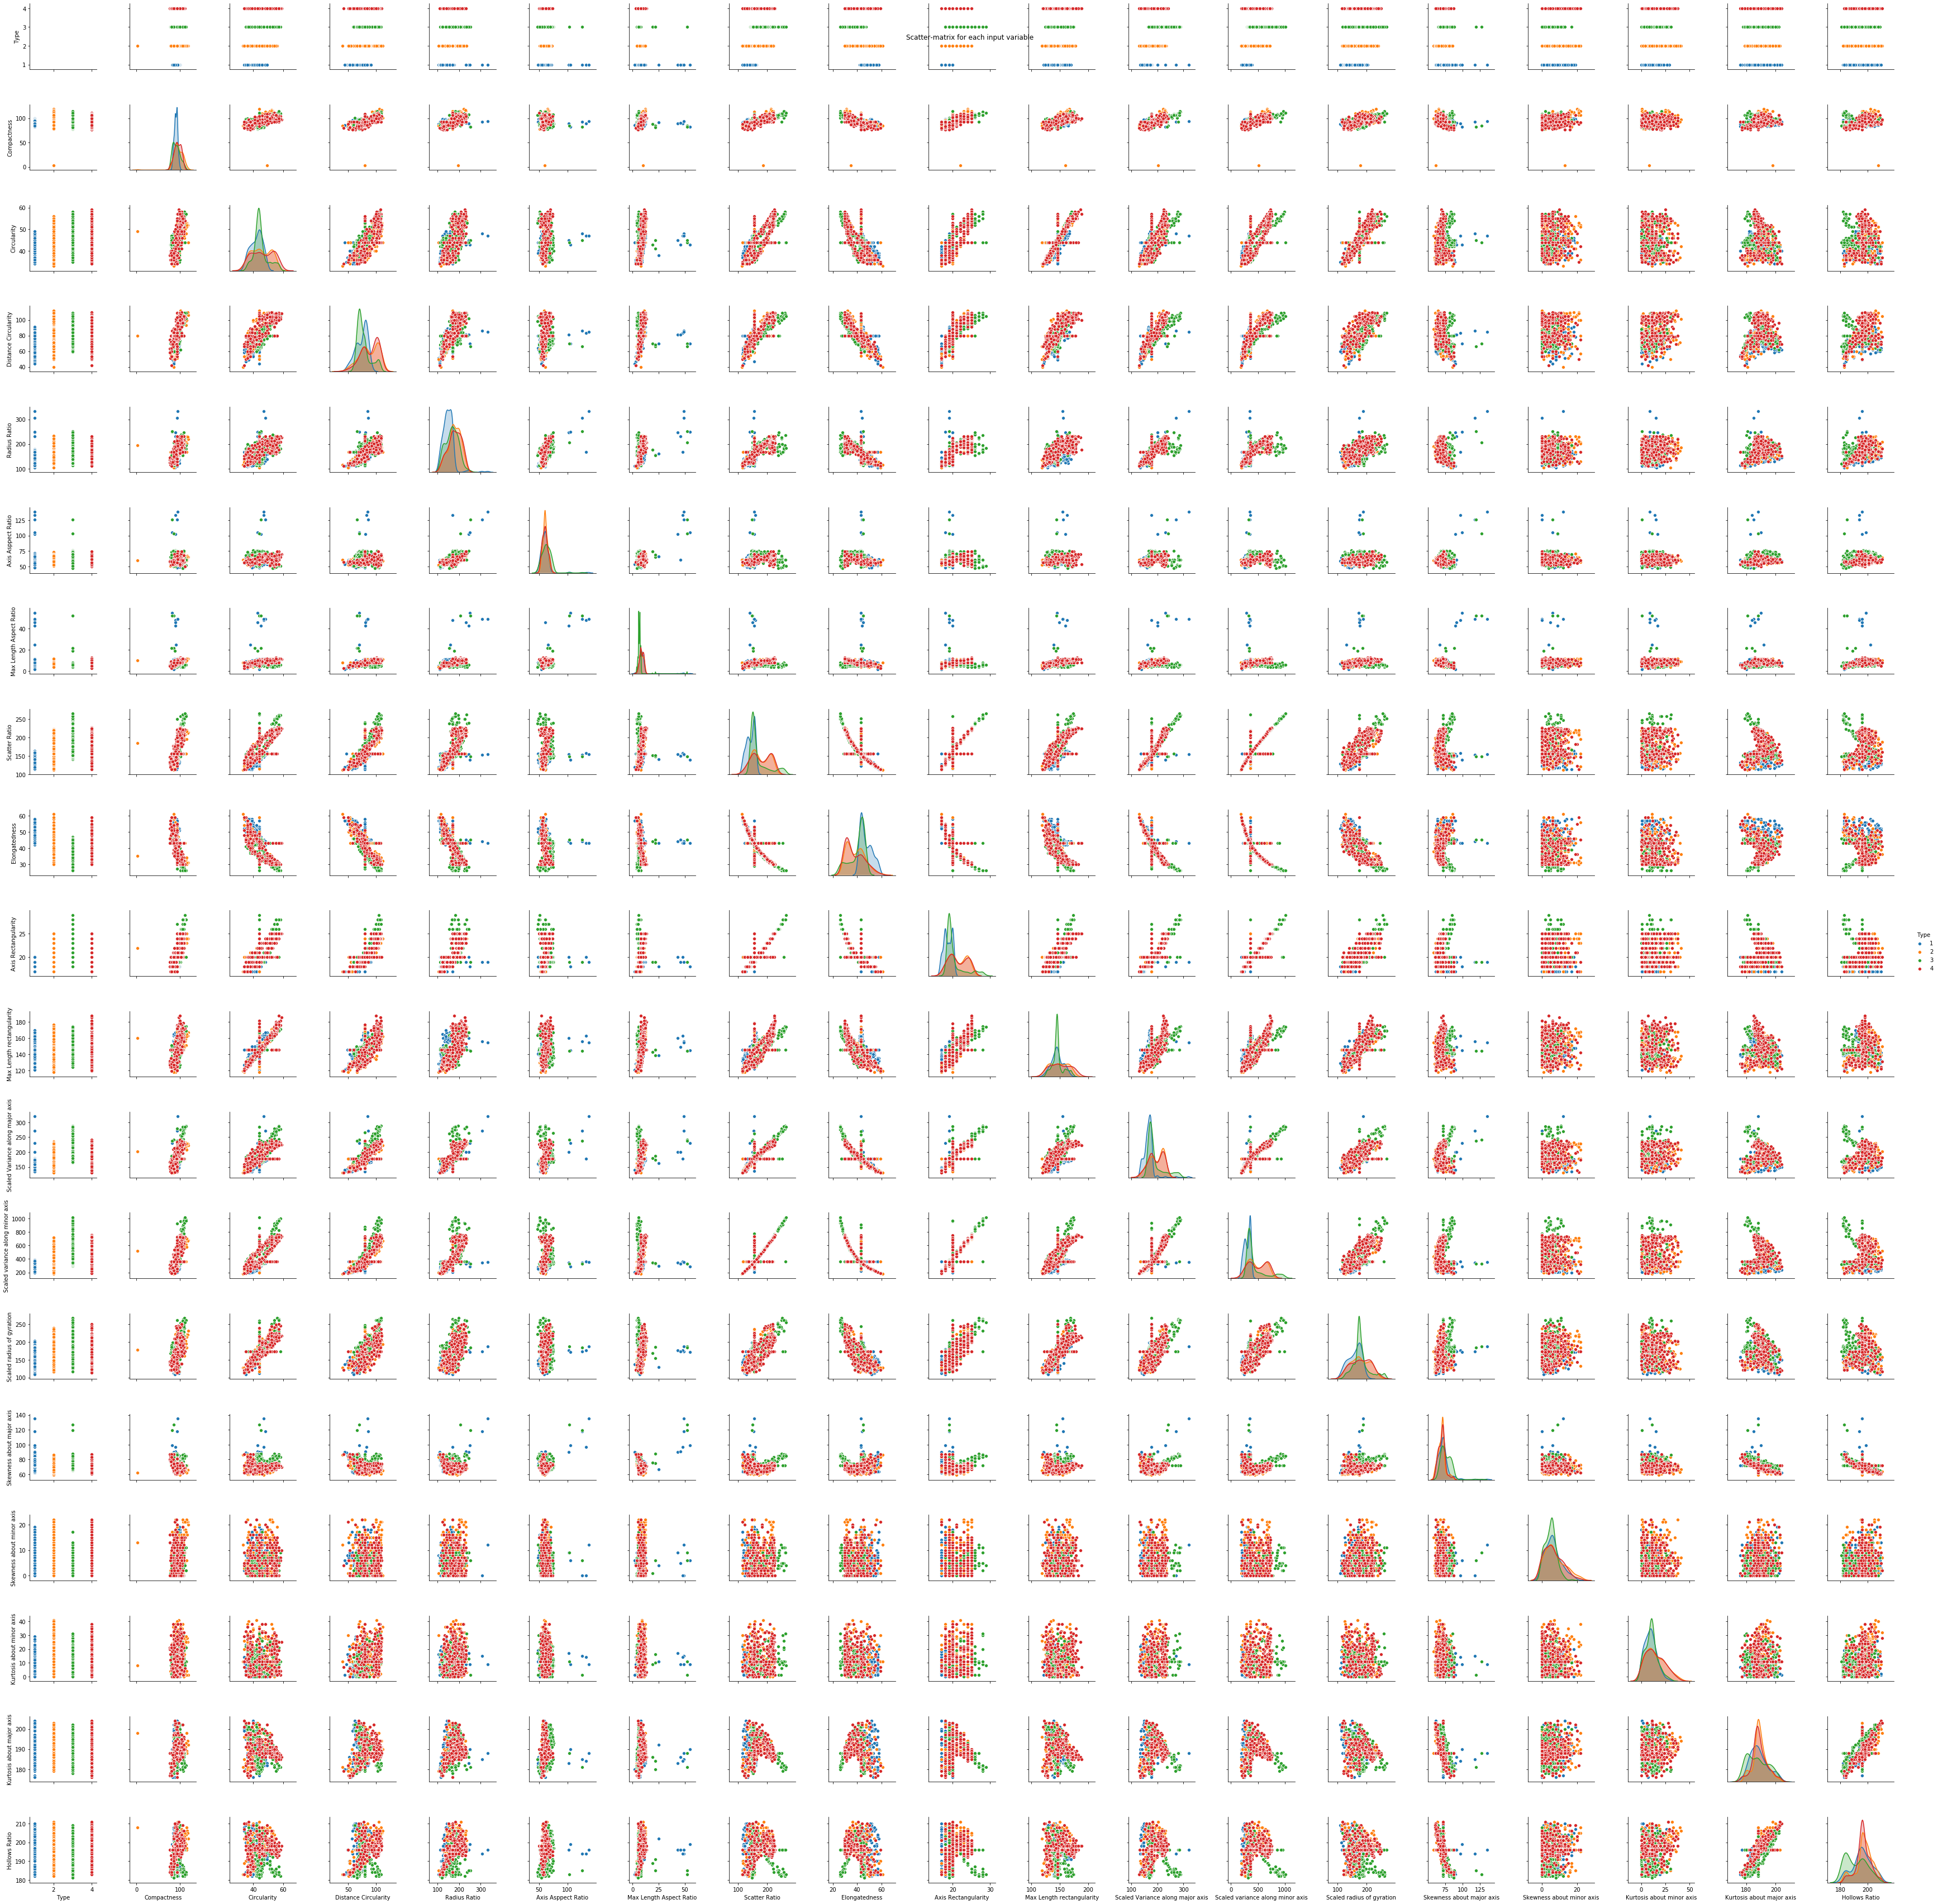

In [7]:
from pandas.plotting import scatter_matrix
from matplotlib import cm
feature_names = ['Compactness', 'Circularity', 'Distance Circularity', 'Radius Ratio','Axis Asppect Ratio','Max Length Aspect Ratio','Scatter Ratio','Elongatedness','Axis Rectangularity','Max Length rectangularity','Scaled Variance along major axis','Scaled variance along minor axis','Scaled radius of gyration','Skewness about major axis','Skewness about minor axis','Kurtosis about minor axis','Kurtosis about major axis','Hollows Ratio']
X = vehicle[feature_names]
#X=vehicle[['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r']]
y = vehicle['Type']
cmap = cm.get_cmap('gnuplot')
sns.pairplot(vehicle.iloc[:,1:20],hue="Type")
#scatter_matrix(iris_df, alpha=0.2, figsize=(10, 10))
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('vehicle_scatter_matrix')

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy of Logistic regression classifier on training set: 0.72
Accuracy of Logistic regression classifier on test set: 0.59
              precision    recall  f1-score   support

           1       0.67      0.91      0.77        32
           2       0.47      0.38      0.42        52
           3       0.72      0.80      0.76        35
           4       0.51      0.45      0.48        47

    accuracy                           0.59       166
   macro avg       0.59      0.63      0.61       166
weighted avg       0.57      0.59      0.58       166

[[29  0  3  0]
 [10 20  5 17]
 [ 1  3 28  3]
 [ 3 20  3 21]]


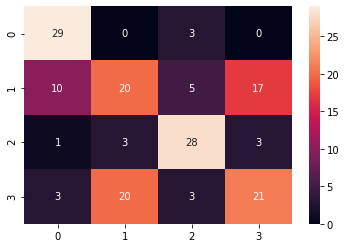

In [32]:
#LR
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = logreg.predict(X_test)
print(classification_report(y_test, pred))


cm = confusion_matrix(y_test, pred)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap= sns.heatmap(df_cm, annot= True,fmt="d")

In [10]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = lda.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

Accuracy of LDA classifier on training set: 0.72
Accuracy of LDA classifier on test set: 0.60
[[29  0  2  1]
 [10 21  5 16]
 [ 1  2 27  5]
 [ 3 18  3 23]]
              precision    recall  f1-score   support

           1       0.67      0.91      0.77        32
           2       0.51      0.40      0.45        52
           3       0.73      0.77      0.75        35
           4       0.51      0.49      0.50        47

    accuracy                           0.60       166
   macro avg       0.61      0.64      0.62       166
weighted avg       0.59      0.60      0.59       166



Accuracy of QDA classifier on training set: 0.82
Accuracy of QDA classifier on test set: 0.62
              precision    recall  f1-score   support

           1       0.81      0.81      0.81        32
           2       0.49      0.33      0.39        52
           3       0.90      0.80      0.85        35
           4       0.47      0.68      0.56        47

    accuracy                           0.62       166
   macro avg       0.67      0.66      0.65       166
weighted avg       0.63      0.62      0.62       166

[[26  1  1  4]
 [ 6 17  2 27]
 [ 0  2 28  5]
 [ 0 15  0 32]]


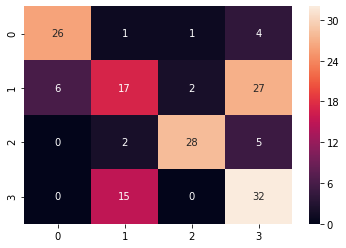

In [35]:
#QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda=QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
print('Accuracy of QDA classifier on training set: {:.2f}'
     .format(qda.score(X_train, y_train)))
print('Accuracy of QDA classifier on test set: {:.2f}'
     .format(qda.score(X_test, y_test)))

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = qda.predict(X_test)
print(classification_report(y_test, pred))

cm = confusion_matrix(y_test, pred)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap= sns.heatmap(df_cm, annot= True,fmt="d")

Accuracy of SVM classifier on training set: 0.84
Accuracy of SVM classifier on test set: 0.66
              precision    recall  f1-score   support

           1       0.81      0.81      0.81        32
           2       0.49      0.33      0.39        52
           3       0.90      0.80      0.85        35
           4       0.47      0.68      0.56        47

    accuracy                           0.62       166
   macro avg       0.67      0.66      0.65       166
weighted avg       0.63      0.62      0.62       166

[[26  1  1  4]
 [ 6 17  2 27]
 [ 0  2 28  5]
 [ 0 15  0 32]]


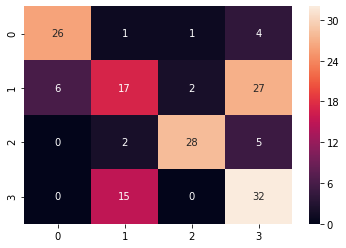

In [36]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = qda.predict(X_test)
print(classification_report(y_test, pred))
cm = confusion_matrix(y_test, pred)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap= sns.heatmap(df_cm, annot= True,fmt="d")

[Text(153.0425551470588, 211.7178947368421, 'X[5] <= 7.5\nentropy = 0.75\nsamples = 826\nvalue = [194, 209, 214, 209]'),
 Text(79.06823529411764, 200.2736842105263, 'X[7] <= 47.5\nentropy = 0.649\nsamples = 331\nvalue = [51, 55, 174, 51]'),
 Text(40.55529411764706, 188.82947368421054, 'X[9] <= 136.5\nentropy = 0.441\nsamples = 240\nvalue = [5, 33, 174, 28]'),
 Text(19.84, 177.38526315789474, 'X[4] <= 60.5\nentropy = 0.662\nsamples = 61\nvalue = [2, 22, 25, 12]'),
 Text(9.336470588235294, 165.94105263157894, 'X[11] <= 243.5\nentropy = 0.514\nsamples = 29\nvalue = [2, 18, 0, 9]'),
 Text(7.00235294117647, 154.49684210526317, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0, 0, 0]'),
 Text(11.670588235294117, 154.49684210526317, 'X[0] <= 84.5\nentropy = 0.444\nsamples = 27\nvalue = [0, 18, 0, 9]'),
 Text(7.00235294117647, 143.05263157894737, 'X[1] <= 38.5\nentropy = 0.48\nsamples = 10\nvalue = [0, 4, 0, 6]'),
 Text(4.668235294117647, 131.60842105263157, 'X[4] <= 56.5\nentropy = 0.444\nsamples = 

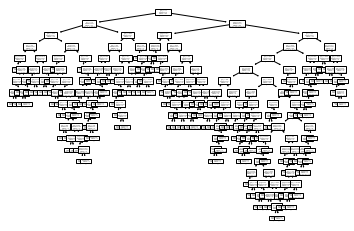

In [37]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)
tree.plot_tree(clf.fit(X,y))

In [14]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 10).fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

Accuracy of Decision Tree classifier on training set: 0.95
Accuracy of Decision Tree classifier on test set: 0.64
[[26  1  1  4]
 [ 3 22  1 26]
 [ 1  1 31  2]
 [ 2 17  1 27]]
              precision    recall  f1-score   support

           1       0.81      0.81      0.81        32
           2       0.54      0.42      0.47        52
           3       0.91      0.89      0.90        35
           4       0.46      0.57      0.51        47

    accuracy                           0.64       166
   macro avg       0.68      0.67      0.67       166
weighted avg       0.65      0.64      0.64       166



Accuracy of GNB classifier on training set: 0.51
Accuracy of GNB classifier on test set: 0.44
              precision    recall  f1-score   support

           1       0.37      0.94      0.53        32
           2       0.50      0.42      0.46        52
           3       0.71      0.14      0.24        35
           4       0.47      0.34      0.40        47

    accuracy                           0.44       166
   macro avg       0.51      0.46      0.41       166
weighted avg       0.51      0.44      0.41       166

[[30  1  1  0]
 [21 22  1  8]
 [18  2  5 10]
 [12 19  0 16]]


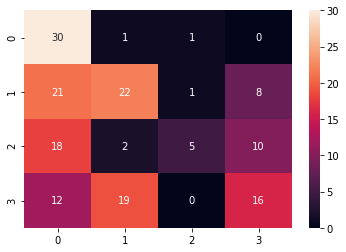

In [38]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = gnb.predict(X_test)
print(classification_report(y_test, pred))
cm = confusion_matrix(y_test, pred)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap= sns.heatmap(df_cm, annot= True,fmt="d")

Accuracy of K-NN classifier on training set: 0.80
Accuracy of K-NN classifier on test set: 0.58
              precision    recall  f1-score   support

           1       0.74      0.88      0.80        32
           2       0.41      0.35      0.38        52
           3       0.79      0.94      0.86        35
           4       0.43      0.38      0.40        47

    accuracy                           0.58       166
   macro avg       0.59      0.64      0.61       166
weighted avg       0.56      0.58      0.57       166

[[28  1  3  0]
 [ 6 18  5 23]
 [ 0  1 33  1]
 [ 4 24  1 18]]


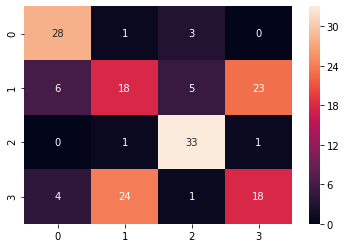

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(classification_report(y_test, pred))
cm = confusion_matrix(y_test, pred)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap= sns.heatmap(df_cm, annot= True,fmt="d")

Accuracy of Bagging classifier on training set: 1.00
Accuracy of Bagging classifier on test set: 0.61
              precision    recall  f1-score   support

           1       0.76      0.88      0.81        32
           2       0.44      0.37      0.40        52
           3       0.78      0.89      0.83        35
           4       0.50      0.49      0.49        47

    accuracy                           0.61       166
   macro avg       0.62      0.65      0.63       166
weighted avg       0.59      0.61      0.60       166

[[28  2  0  2]
 [ 7 19  7 19]
 [ 1  1 31  2]
 [ 1 21  2 23]]


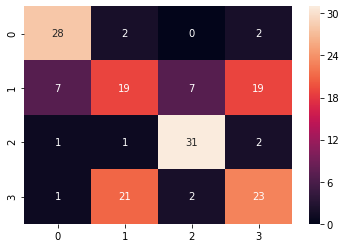

In [41]:
#################################### Bagging ######################################
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
import csv

seed = 7
cart = DecisionTreeClassifier()
num_trees = 100
bg = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)

bg.fit(X_train, y_train)
print('Accuracy of Bagging classifier on training set: {:.2f}'
     .format(bg.score(X_train, y_train)))
print('Accuracy of Bagging classifier on test set: {:.2f}'
     .format(bg.score(X_test, y_test)))

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = bg.predict(X_test)
print(classification_report(y_test, pred))

cm = confusion_matrix(y_test, pred)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap= sns.heatmap(df_cm, annot= True,fmt="d")

Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.69
              precision    recall  f1-score   support

           1       0.79      0.97      0.87        32
           2       0.58      0.50      0.54        52
           3       0.83      0.97      0.89        35
           4       0.59      0.51      0.55        47

    accuracy                           0.69       166
   macro avg       0.70      0.74      0.71       166
weighted avg       0.67      0.69      0.68       166

[[31  0  0  1]
 [ 6 26  4 16]
 [ 1  0 34  0]
 [ 1 19  3 24]]


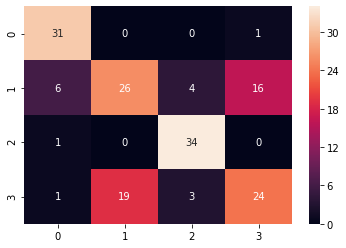

In [42]:
###################################### Random Forest code ##############################
import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
data = pd.read_csv("vehicle_4_mean.csv")

Y = data.Type
X = data.drop(['Vehicle','Type'], axis=1)

seed = 7
num_trees = 100
max_features = 3

rf = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)

rf.fit(X_train, y_train)
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = rf.predict(X_test)
print(classification_report(y_test, pred))
cm = confusion_matrix(y_test, pred)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap= sns.heatmap(df_cm, annot= True,fmt="d")

Accuracy of Adaboost classifier on training set: 0.65
Accuracy of Adaboost classifier on test set: 0.57
              precision    recall  f1-score   support

           1       0.86      0.78      0.82        32
           2       0.45      0.44      0.45        52
           3       0.73      0.69      0.71        35
           4       0.42      0.47      0.44        47

    accuracy                           0.57       166
   macro avg       0.61      0.59      0.60       166
weighted avg       0.58      0.57      0.57       166

[[25  4  2  1]
 [ 3 23  5 21]
 [ 0  2 24  9]
 [ 1 22  2 22]]


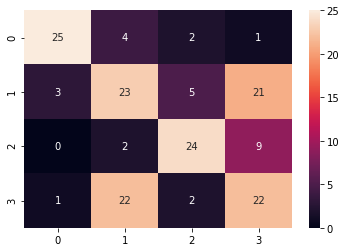

In [43]:
from sklearn.ensemble import AdaBoostClassifier

seed = 7
num_trees = 70
ab = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
ab.fit(X_train, y_train)
print('Accuracy of Adaboost classifier on training set: {:.2f}'
     .format(ab.score(X_train, y_train)))
print('Accuracy of Adaboost classifier on test set: {:.2f}'
     .format(ab.score(X_test, y_test)))

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = ab.predict(X_test)
print(classification_report(y_test, pred))
cm = confusion_matrix(y_test, pred)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap= sns.heatmap(df_cm, annot= True,fmt="d")